# Dataset code generator 

### You Need to tweak Value based on dataset



import numpy as np
import os
import cv2
import pathlib
import zipfile
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [294]:
train_image_generator = image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
  )

no_filter_image_generator = image.ImageDataGenerator()

# train_data_gen = train_image_generator.flow_from_directory(batch_size=1,
#                                                            directory="./Hand_2",
#                                                            class_mode='categorical',
#                                                           #  color_mode="grayscale",
#                                                            save_to_dir='./preview',
#                                                            target_size=(128, 128),
#                                                            )

# image_batch, label_batch = next(train_data_gen)
# print(label_batch)
# print(image_batch[0].shape)
# plt.imshow(image_batch[0][:,:,0])
# plt.show()

In [295]:
# change number based on file name file name
number = 8
path="./Hand_2/05/"+str(number)+".jpg"
prefix = str(number)+"_05_"

In [296]:
img = image.load_img(path, target_size=(128, 128), color_mode='rgb')
img_array = image.img_to_array(img)

img_array = img_array.reshape((1,) + img_array.shape) 
img_array.shape

(1, 128, 128, 3)

(1, 128, 128, 3)

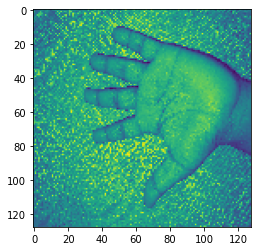

In [297]:
img1=img_array
plt.imshow(img1[0,:,:,0])
img1.shape

In [298]:
i = 0
rotate_image = img1.transpose() # for rotating & grayscale
rgb_image = rotate_image.transpose(3,1,2,0) # for converting rgb


for batch in no_filter_image_generator.flow(rgb_image, batch_size=1,
                          save_to_dir='preview', save_prefix=prefix, save_format='jpg'):
    i += 1
    if i > 1:
        break  # otherwise the generator would loop indefinitely



i = 0
for batch in train_image_generator.flow(rgb_image, batch_size=1,
                          save_to_dir='preview', save_prefix=prefix, save_format='jpg'):
    i += 1
    if i > 47:
        break  # otherwise the generator would loop indefinitely